In [60]:

import sqlite3
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## About the data 
Dataset with historical stock prices ( 5 years) for all companies currently found on the S&P 500 index.

csv_data folder  contains files of data for individual stocks, labelled by their stock ticker name.
All the files have the following columns:
Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

## Database connection using sqlite 3

In [61]:
db_path = 'stockprice.db'
con = sqlite3.connect(db_path)

Test db connection with a simple sql statement


In [62]:
sql_base_select = 'SELECT {} FROM {};'

# format sql string
sql = sql_base_select.format('*', 'AAP_data')

# run select statement and show results
AAP_data= pd.read_sql(sql, con)
AAP_data.reset_index()
AAP_data.head()

,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
1,1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2,2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
3,3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
4,4,2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


Collecting Various Stock Data

Here we are using Advance Auto Parts, Inc. (ticker = AAP) as an example.

In [63]:
start = dt.datetime(2013,2,8)
end = dt.datetime(2018,2,7)

AAP_data.tail(5)


,index,date,open,high,low,close,volume,Name
1254,1254,2018-02-01,116.24,118.8300,115.830,117.29,760629,AAP
1255,1255,2018-02-02,115.92,117.1800,113.125,113.93,1092333,AAP
1256,1256,2018-02-05,113.05,114.9700,109.810,109.86,1281592,AAP
1257,1257,2018-02-06,108.28,113.1100,106.745,112.20,1240784,AAP
1258,1258,2018-02-07,112.09,114.5799,109.900,109.93,2163545,AAP


In [64]:
company_list =['AAPL_data','AMZN_data','GOOG_data','MSFT_data']

all_data = pd.DataFrame()
a=0
asql = ''
for tableToMerge in company_list:
    if a != len(company_list)-1:
        asql +=  'SELECT * FROM '+tableToMerge+' UNION '
    else:
        asql += 'SELECT * FROM '+tableToMerge+' ORDER BY Name;'
    # format sql string
    a = a+1
# run select statement and show results
all_data = pd.read_sql(asql, con)
all_data.head(6)


,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [65]:
## dimensions of all_data dataframe
all_data.shape


(4752, 8)

In [66]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

## Analysing change in Price in Stock overtime 

In [67]:
# checking missing values
all_data.isnull().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [68]:
#checking data types
all_data.dtypes

index       int64
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [69]:
## converting data-type of "date" featuer into date-time ..
all_data['date'] =pd.to_datetime(all_data['date'])

In [70]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [71]:
tech_list =all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

## Creating subplots for Company list

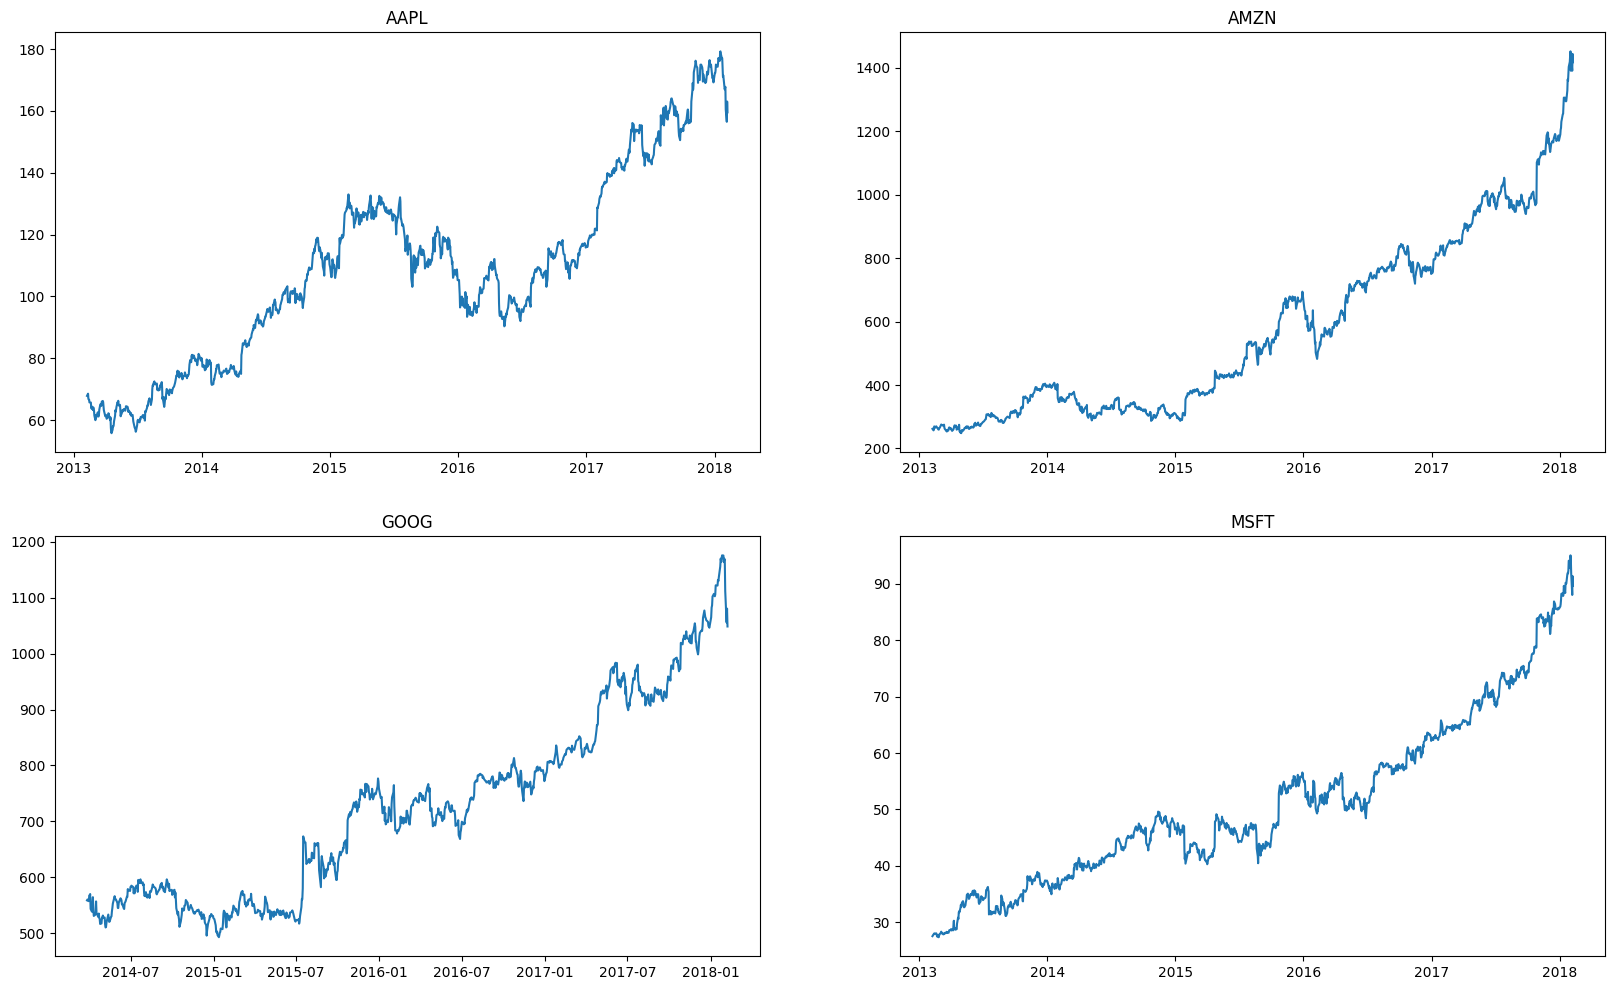

In [72]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, start=1):
## creating subplot for each stock
    plt.subplot(2, 2, index)
    filter1 =all_data['Name']==company
    df =all_data[filter1]
## plotting 'date' vs 'close'    
    plt.plot(df['date'], df['close'])
    plt.title(company)

## Moving average of various stocks

In [73]:
all_data.head(15)

,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [74]:
all_data['close'].rolling(window=10).mean().head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
14    63.91538
Name: close, dtype: float64

In [75]:
new_all =all_data.copy()

In [76]:
##Lets consider different windows of rolling, ie 10 days, 20 days, 50 days
ma_day =[10, 20, 50]

for ma in ma_day:
    new_all['close_'+str(ma)]= new_all['close'].rolling(ma).mean()
     

In [77]:
new_all.tail()

,index,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,1258,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [78]:
##for time-series problem in pandas we have set 'date' as index
new_all.set_index('date' , inplace=True)

In [79]:
new_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4752 entries, 2013-02-08 to 2018-02-07
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     4752 non-null   int64  
 1   open      4752 non-null   float64
 2   high      4752 non-null   float64
 3   low       4752 non-null   float64
 4   close     4752 non-null   float64
 5   volume    4752 non-null   int64  
 6   Name      4752 non-null   object 
 7   close_10  4743 non-null   float64
 8   close_20  4733 non-null   float64
 9   close_50  4703 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 408.4+ KB


## Plots of closing price with moving average 
what was the moving average of various stock data

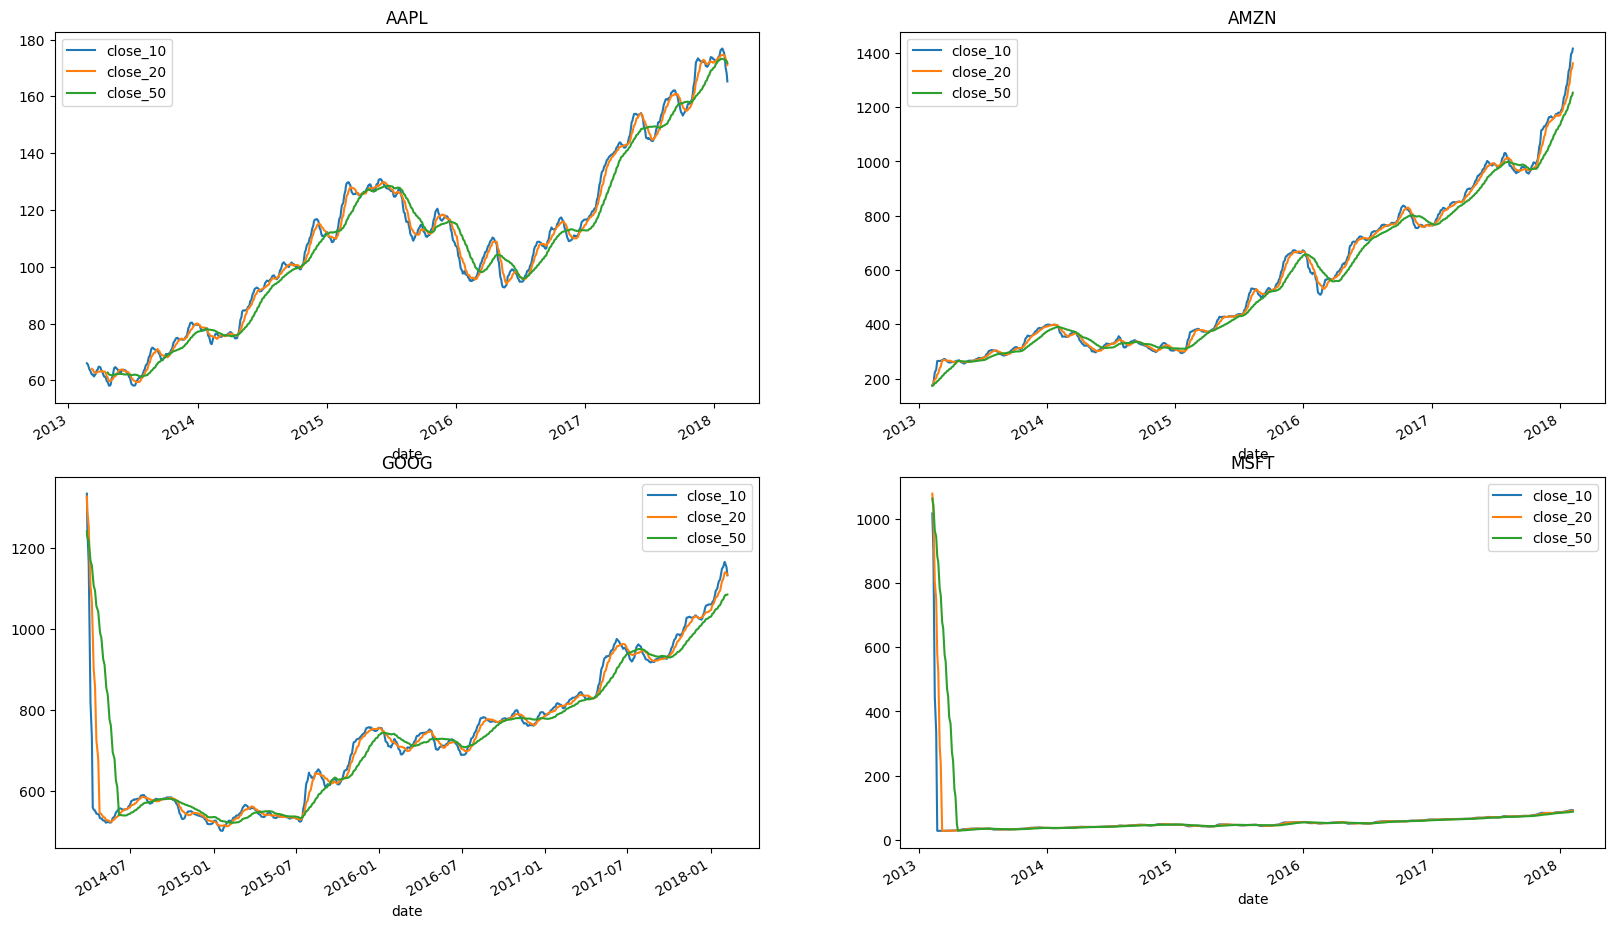

In [80]:
plt.figure(figsize=(20, 12))
## 
for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 =new_all['Name']== company
    df = new_all[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca()) ##gca-get current axis
    plt.title(company)
## close_50 donot have extreme values i.e its removes the noise in data
## so more the window parameter more better plots

## Analyse Closing price change in apple stock !
Daily Stock Return Formula.

To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [81]:
apple =pd.read_sql('SELECT * FROM AAPL_data;', con)
apple.head(4)

,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [82]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [83]:
apple.head(4)

,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [84]:
# pct_change() returns the Fractional change between the current and a prior value
apple['Daily Return(%)']= apple['close'].pct_change() * 100

In [85]:
apple.head()

,index,date,open,high,low,close,volume,Name,Daily Return(%)
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [86]:
## Plotting Line-plot of "date" vs "Daily return(%)"
px.line(apple , x="date" , y="Daily Return(%)") 

## Performing resampling analysis of closing price 

Before doing resampling,first u have to make your date feature 'row-index' so that u can resample data on various basis :
    
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')

In [87]:
apple.dtypes

index                int64
date                object
open               float64
high               float64
low                float64
close              float64
volume               int64
Name                object
Daily Return(%)    float64
dtype: object

In [88]:
apple['date'] =pd.to_datetime(apple['date'])

In [89]:
apple.dtypes

index                       int64
date               datetime64[ns]
open                      float64
high                      float64
low                       float64
close                     float64
volume                      int64
Name                       object
Daily Return(%)           float64
dtype: object

In [90]:
apple.head()

,index,date,open,high,low,close,volume,Name,Daily Return(%)
0,0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [91]:
apple.set_index('date' , inplace=True)

In [92]:
apple.head()

,index,open,high,low,close,volume,Name,Daily Return(%)
date,,,,,,,,
2013-02-08,0,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,1,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,2,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,3,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,4,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [93]:
## resample data on monthly basis ..
apple['close'].resample('M').mean() 

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

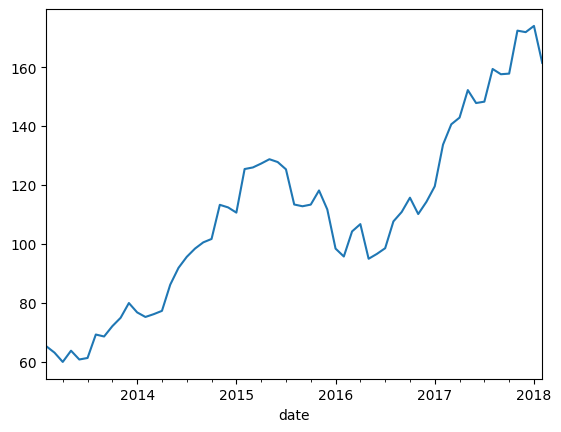

In [94]:
apple['close'].resample('M').mean().plot()

In [95]:
## resample data on Yearly basis ..
apple['close'].resample('Y').mean() 

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

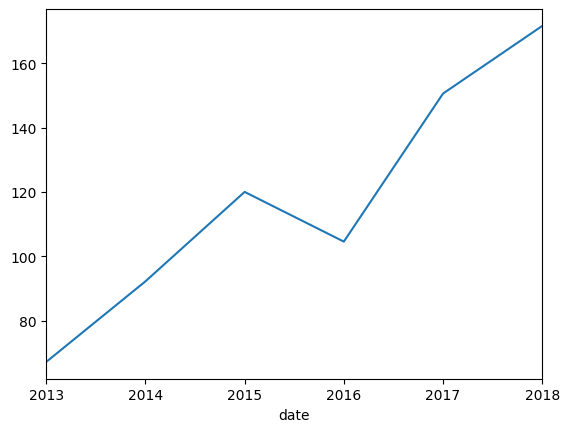

In [96]:
apple['close'].resample('Y').mean().plot() 

In [97]:
## resample data on Quarterly basis ..
apple['close'].resample('Q').mean() 

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

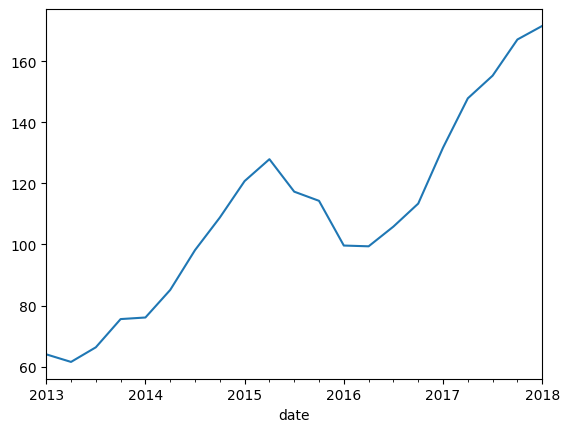

In [98]:
apple['close'].resample('Q').mean().plot()

### Closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not

In [99]:
company_list

['AAPL_data', 'AMZN_data', 'GOOG_data', 'MSFT_data']

In [100]:
company_list[0]

'AAPL_data'

In [101]:
app =pd.read_sql('SELECT * FROM AAPL_data;', con)
amzn =pd.read_sql('SELECT * FROM AMZN_data;', con)
google =pd.read_sql('SELECT * FROM GOOG_data;', con)
msft =pd.read_sql('SELECT * FROM MSFT_data;', con)

In [102]:
closing_price =pd.DataFrame()

In [103]:
closing_price['apple_close']=app['close']
closing_price['amzn_close']=amzn['close']
closing_price['google_close']=google['close']
closing_price['msft_close']=msft['close']

In [104]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


Pair-plot is all about , we can considering some pairs & 
    we are trying to plot scatterplot of it..
    
    Unique plots : 4c2 = 6 unique plots
    
    Total plots : 15 ( 6 unique + 6 mirror images of these 
    unique one + 3 diagonal plots(histogram))

Dis-advantages: 
Can't be used when number of features are high.
Cannot visualize higher dimensional patterns in 3-D and 4-D. 
Only possible to view 2D patterns.

NOTE: the diagnol elements are (histogram) for each feature.

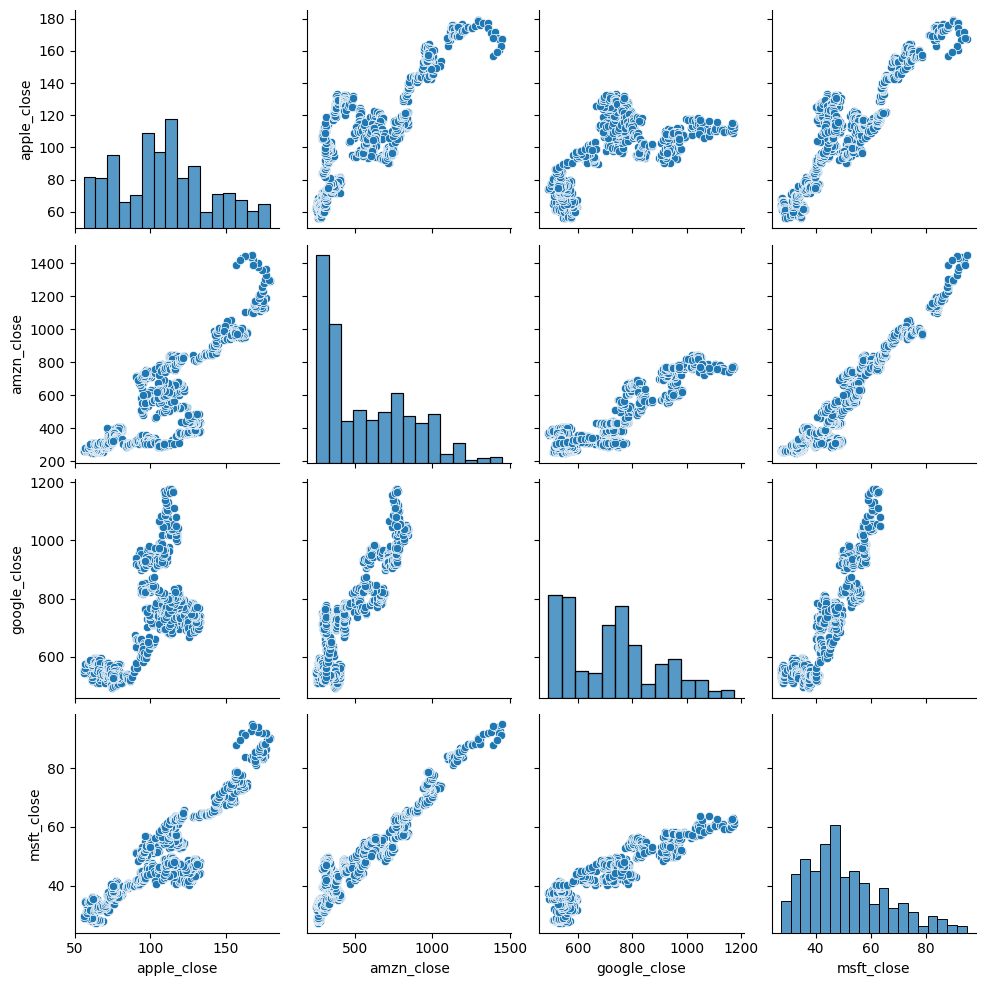

In [105]:
sns.pairplot(closing_price)

In [106]:
##Amazon and microsoft have the highest co -relation 
closing_price.corr()

,apple_close,amzn_close,google_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


co-relation plot for stock prices¶

<Axes: >

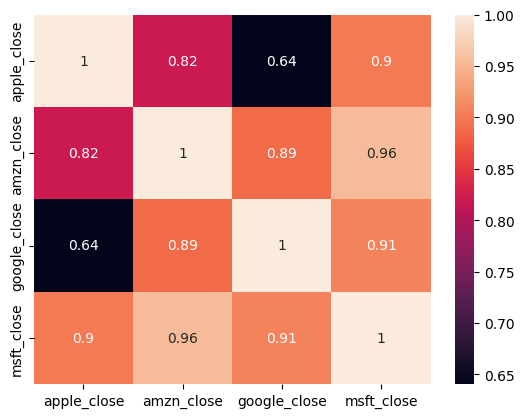

In [107]:
sns.heatmap(closing_price.corr() , annot=True)

## Conclusions : 
Closing price of Google and Microsoft are well correlated
& Closing price of Amazon and Microsoft have a co-relation of 0.96



### Daily Returns in Stock are co-related or not !

In [108]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [109]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [110]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [111]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] -\
                                           closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [112]:
closing_price

,apple_close,amzn_close,google_close,msft_close,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [113]:
closing_pct =closing_price.iloc[:,4:]

In [114]:
closing_pct

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


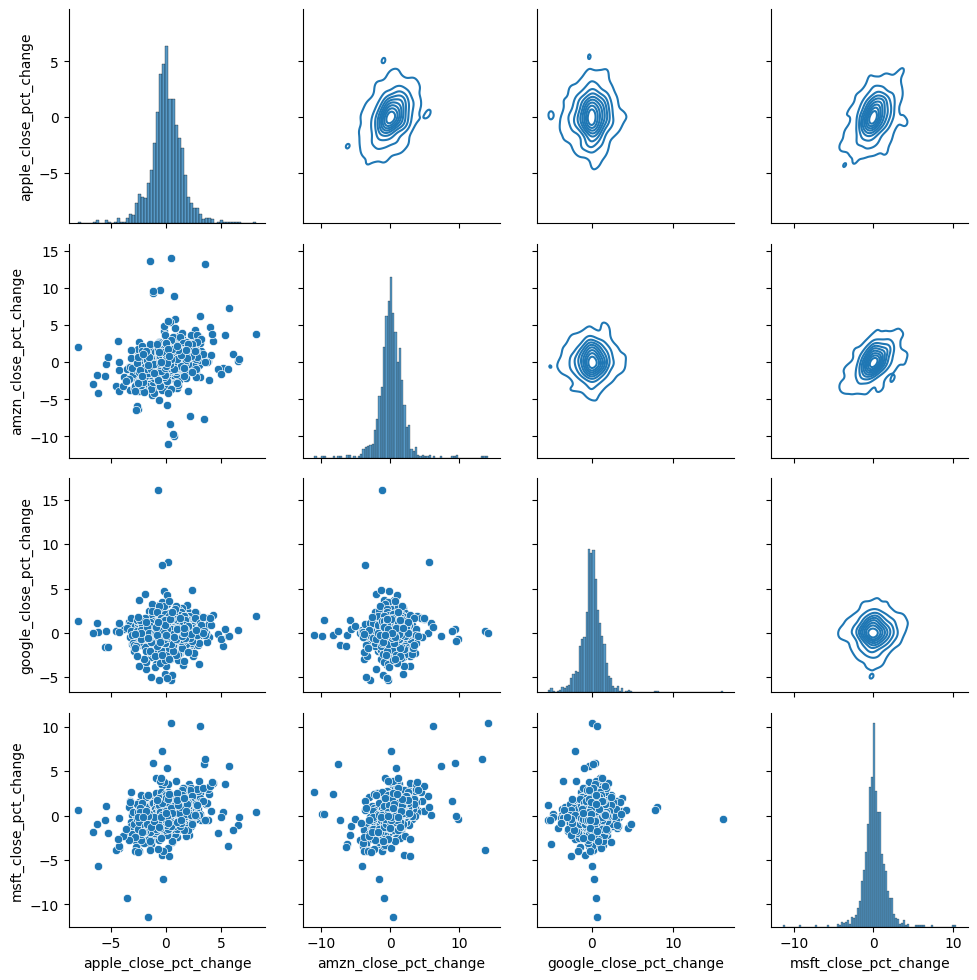

In [115]:
g = sns.PairGrid(data= closing_pct)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [116]:
closing_pct.corr()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
google_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000


### Conclusion:
It shows some linear relationship